In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
AGENT_CSV = "./agents.csv"
MODEL_CSV = "./model.csv"

All the results below are computed with 10 agents and 10 items, for 100 steps

# Model (global) Analysis

In [4]:
model_df = pd.read_csv(MODEL_CSV, index_col=0)
model_df.head()

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2
4,0,0,0,1,0,0,2,0,0,3


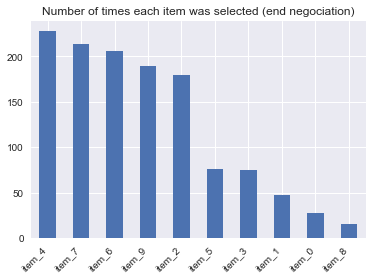

In [4]:
plt.figure()
plt.style.use("seaborn")
model_df.iloc[-1].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45, ha="right")
plt.title("Number of times each item was selected (end negociation)")
plt.savefig("../docs/items_nbr_deals.png", dpi=300)
plt.show()

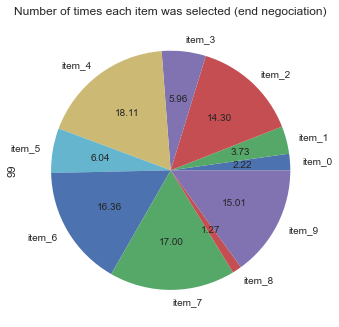

In [56]:
plt.figure()
plt.style.use("seaborn")
model_df.iloc[-1].plot.pie(subplots=True, autopct="%.2f")
plt.title("Number of times each item was selected (end negociation)")
plt.savefig("../docs/items_nbr_deals_pie.png", dpi=300)
plt.show()

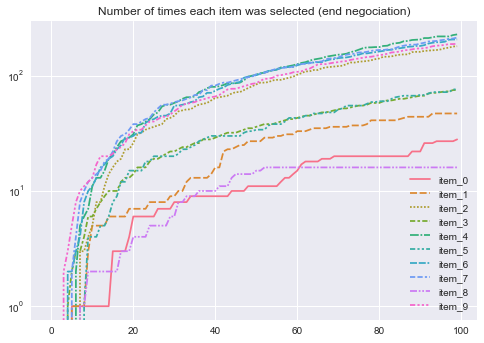

In [57]:
plt.figure()
plt.style.use("seaborn")
sns.lineplot(
    data=model_df
)
plt.yscale("log")
plt.title("Number of times each item was selected (end negociation)")
plt.savefig("../docs/items_nbr_deals_line.png", dpi=300)
plt.show()

# Agent (specific) Analysis

In [5]:
agent_df = pd.read_csv(AGENT_CSV, index_col=0).reset_index()
agent_df.head()

,Step,AgentID,nbr_won,nbr_sent_messages,nbr_agreements,deals_won,performative_uses
0,0,0,0,0,0,"[3, 3, 3, 4, 9, 3, 4, 3, 6, 6, 3, 4, 3, 3, 9, ...","{'PROPOSE': 119, 'ACCEPT': 53, 'COMMIT': 216, ..."
1,0,1,0,0,0,"[1, 1, 2, 1, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 2, ...","{'PROPOSE': 237, 'ACCEPT': 200, 'COMMIT': 424,..."
2,0,2,0,0,0,"[2, 2, 2, 2, 2, 9, 2, 2, 9, 2, 2, 4, 8, 7, 7, ...","{'PROPOSE': 154, 'ACCEPT': 94, 'COMMIT': 291, ..."
3,0,3,0,0,0,"[5, 5, 1, 8, 8, 5, 5, 1, 5, 6, 8, 5, 8, 5, 5, ...","{'PROPOSE': 131, 'ACCEPT': 130, 'COMMIT': 244,..."
4,0,4,0,0,0,"[1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 9, 5, 1, 5, 1, ...","{'PROPOSE': 182, 'ACCEPT': 175, 'COMMIT': 337,..."


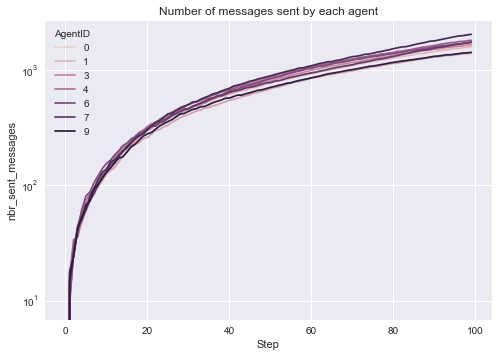

In [59]:
plt.figure()
sns.lineplot(
    data=agent_df,
    x="Step",
    y="nbr_sent_messages",
    hue="AgentID",
)
plt.yscale("log")
plt.title("Number of messages sent by each agent")
plt.savefig("../docs/agents_nbr_sent_messages.png", dpi=300)
plt.show()

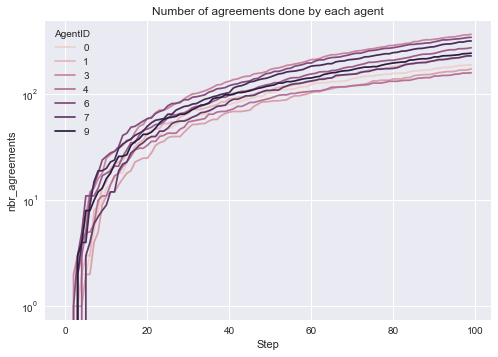

In [60]:
plt.figure()
sns.lineplot(
    data=agent_df,
    x="Step",
    y="nbr_agreements",
    hue="AgentID",
)
plt.yscale("log")
plt.title("Number of agreements done by each agent")
plt.savefig("../docs/agents_nbr_agreements.png", dpi=300)
plt.show()

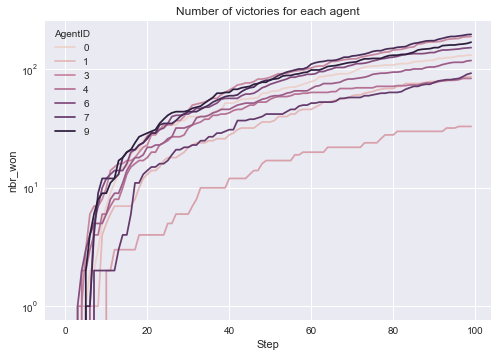

In [61]:
plt.figure()
sns.lineplot(
    data=agent_df,
    x="Step",
    y="nbr_won",
    hue="AgentID",
)
plt.yscale("log")
plt.title("Number of victories for each agent")
plt.savefig("../docs/agents_nbr_won.png", dpi=300)
plt.show()

In [7]:
nb_agents = len(agent_df["AgentID"].unique())
nb_items = len(model_df.columns)
nb_perfo = len(eval(agent_df["performative_uses"].iloc[0]).keys())

C:\Users\timch\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  from ipykernel import kernelapp as app


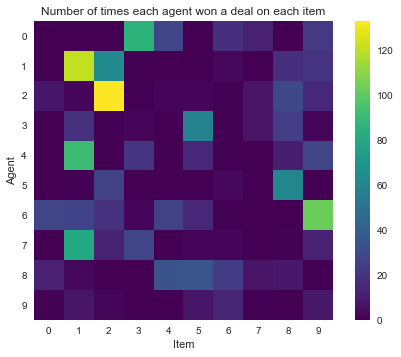

In [35]:
# matrix agent - item

# for each agent, retrieve the list of items he won deals on
agent_item_mat = np.zeros((nb_agents, nb_items), dtype=np.int)

# we only need to look at one line for each agent
for agent_id in range(nb_agents):
    items_dealt_list = eval(agent_df[agent_df["AgentID"] == agent_id]["deals_won"].iloc[0])
    for item_id in items_dealt_list:
        agent_item_mat[agent_id, item_id] += 1

plt.style.use("seaborn")
plt.grid(False)
plt.imshow(agent_item_mat, cmap="viridis")
plt.colorbar()
plt.title("Number of times each agent won a deal on each item")
plt.xlabel("Item")
plt.xticks(range(nb_items), range(nb_items))
plt.ylabel("Agent")
plt.yticks(range(nb_agents), range(nb_agents))
plt.savefig("../docs/agents_items_matrix.png", dpi=300)

C:\Users\timch\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  del sys.path[0]


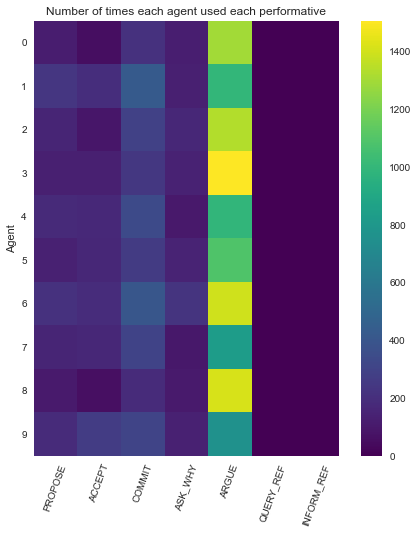

In [38]:
# performative usage
perfo_types = eval(agent_df["performative_uses"].iloc[0]).keys()
perfo_mat = np.zeros((nb_agents, nb_perfo), dtype=np.int)

for agent_id in range(nb_agents):
    for perfo_number, perfo_name in enumerate(perfo_types):
        perfo_mat[agent_id, perfo_number] = eval(agent_df[agent_df["AgentID"] == agent_id]["performative_uses"].iloc[0])[perfo_name]

plt.figure(figsize=(8, 8))
plt.grid(False)
plt.imshow(perfo_mat, cmap="viridis")
plt.ylabel("Agent")
plt.colorbar()
plt.title("Number of times each agent used each performative")
plt.yticks(range(nb_agents), range(nb_agents))
plt.xticks(range(nb_perfo), perfo_types,  rotation = 70);
plt.savefig("../docs/agents_performatives_matrix.png", dpi=300)

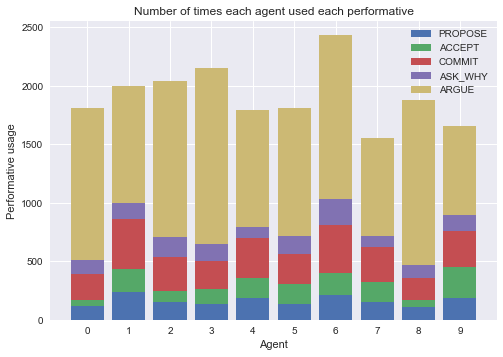

In [33]:
# barplot performative usage

bottom = [0]*nb_agents
for perfo_number, perfo_name in enumerate(list(perfo_types)[:-2]):
    plt.bar(range(nb_agents), perfo_mat[:,perfo_number], label=list(perfo_types)[perfo_number], bottom=bottom)
    bottom = [x + y for x, y in zip(bottom, perfo_mat[:,perfo_number])]

plt.style.use("seaborn")
plt.xlabel('Agent')
plt.ylabel("Performative usage")
plt.xticks(range(nb_agents), range(nb_agents));
plt.legend()
plt.title("Number of times each agent used each performative")
plt.savefig("../docs/agents_performatives_barplot.png", dpi=300)